The purpose of this code is to analyze our Major Mergers further.

In [1]:
%matplotlib inline
#%matplotlib notebook


import pandas as pd
import numpy as np
import MajorMergerFunctions as mmf
import time
import matplotlib.pyplot as plt
import webbrowser
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
#import plotly.plotly as px




Make dataframes

In [2]:


obs_data=pd.read_csv('/Users/spencershortt/TNG2019/observe_pairs_300.txt', sep="\t")
thr_data=pd.read_csv('/Users/spencershortt/TNG2019/threeD_pairs_300.txt', sep="\t")
#obs_data=pd.read_csv('/Users/spencershortt/TNG2019/observe_pairs_100.txt', sep="\t")
#thr_data=pd.read_csv('/Users/spencershortt/TNG2019/threeD_pairs_100.txt', sep="\t")


observe_pairs=pd.DataFrame(obs_data)
threeD_pairs=pd.DataFrame(thr_data)

In [3]:
observe_pairs.head()

,Unnamed: 0,Delta_k,GasMass,Pair_IDs,Rel_v_z,Separation,id,mass_stars,pos_x,pos_y,pos_z,sfr,stellarphotometrics_k,vel_x,vel_y,vel_z,sSFR
0,0,0.4686,0.0,"138,218",311.612,16.493938,138,3.92186,43895.2,48848.1,147578.0,0.0,-23.6853,-65.7513,828.828,-380.372,0.0
1,1,0.4686,0.0,"138,218",311.612,16.493938,218,2.52254,43898.3,48831.9,147765.0,0.0,-23.2167,-1488.1100,-429.342,-691.984,0.0
2,2,0.8767,0.0,"158,330",322.560,1.811077,158,3.72198,43734.2,48916.5,147545.0,0.0,-23.5634,-264.2120,-102.807,-1630.210,0.0
3,3,0.8767,0.0,"158,330",322.560,1.811077,330,1.47403,43734.0,48918.3,147555.0,0.0,-22.6867,-268.2300,1558.520,-1307.650,0.0
4,4,0.5663,0.0,"165,264",337.789,8.711487,165,3.08225,45533.7,51898.1,146308.0,0.0,-23.5271,961.0520,-1184.170,181.010,0.0


GET RID OF UNNAMED COLUMN FULL OF NaN's if they are there.

In [4]:
observe_pairs.drop(observe_pairs.columns[observe_pairs.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
threeD_pairs.drop(threeD_pairs.columns[threeD_pairs.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [5]:
observe_pairs.head()

,Delta_k,GasMass,Pair_IDs,Rel_v_z,Separation,id,mass_stars,pos_x,pos_y,pos_z,sfr,stellarphotometrics_k,vel_x,vel_y,vel_z,sSFR
0,0.4686,0.0,"138,218",311.612,16.493938,138,3.92186,43895.2,48848.1,147578.0,0.0,-23.6853,-65.7513,828.828,-380.372,0.0
1,0.4686,0.0,"138,218",311.612,16.493938,218,2.52254,43898.3,48831.9,147765.0,0.0,-23.2167,-1488.1100,-429.342,-691.984,0.0
2,0.8767,0.0,"158,330",322.560,1.811077,158,3.72198,43734.2,48916.5,147545.0,0.0,-23.5634,-264.2120,-102.807,-1630.210,0.0
3,0.8767,0.0,"158,330",322.560,1.811077,330,1.47403,43734.0,48918.3,147555.0,0.0,-22.6867,-268.2300,1558.520,-1307.650,0.0
4,0.5663,0.0,"165,264",337.789,8.711487,165,3.08225,45533.7,51898.1,146308.0,0.0,-23.5271,961.0520,-1184.170,181.010,0.0


Find the triples and groups. we can do this because they will have NaN's for features that require exactly two galaxies

In [6]:
observe_pairs[observe_pairs.isnull().any(axis=1)].tail()
#observe_pairs[observe_pairs.isnull().any(axis=1)].id.values

,Delta_k,GasMass,Pair_IDs,Rel_v_z,Separation,id,mass_stars,pos_x,pos_y,pos_z,sfr,stellarphotometrics_k,vel_x,vel_y,vel_z,sSFR
1254,NaN,0.104955,"1520777,1520779,1520780",NaN,NaN,1520779,0.519277,71102.6,12392.2,45750.2,0.373009,-22.4979,37.3721,-145.5540,190.17200,0.718324
1255,NaN,0.150532,"1520777,1520779,1520780",NaN,NaN,1520780,0.452586,71104.9,12374.5,45758.0,1.126910,-22.6169,-114.9520,247.1100,-2.50813,2.489936
1584,NaN,1.082560,"969261,969268,1902065",NaN,NaN,969261,2.818740,71508.2,70125.9,80258.0,0.000000,-23.7064,77.0560,70.7617,160.43300,0.000000
1585,NaN,0.001045,"969261,969268,1902065",NaN,NaN,969268,0.632508,71500.5,70122.9,80262.9,0.000000,-21.9704,154.9730,114.1840,124.38100,0.000000
1586,NaN,8.272640,"969261,969268,1902065",NaN,NaN,1902065,1.018230,71511.9,70109.2,156248.0,1.152820,-22.9188,-404.3540,-119.2710,-38.02510,1.132180


Find an array that contains the ids for galaxies who are in a triple/group

In [7]:
obs_groups=np.array(observe_pairs[observe_pairs.isnull().any(axis=1)].Pair_IDs.values,dtype=np.str)
obs_groups=np.char.split(obs_groups,sep=',')
obs_groups=np.concatenate(obs_groups)
obs_groups=np.int_(obs_groups)

thr_groups=np.array(threeD_pairs[threeD_pairs.isnull().any(axis=1)].Pair_IDs.values,dtype=np.str)
thr_groups=np.char.split(thr_groups,sep=',')
thr_groups=np.concatenate(thr_groups)
thr_groups=np.int_(thr_groups)

Have to change the dtypes of the major merger ids so that I can compare the triple/group ids

In [8]:
observe_pairs["id"]=np.array(observe_pairs.id.values,dtype=int)
threeD_pairs["id"]=np.array(threeD_pairs.id.values,dtype=int)


Get rid of the triples/groups!

In [9]:
observe_pairs=observe_pairs[~observe_pairs.id.isin(obs_groups)]
threeD_pairs=threeD_pairs[~threeD_pairs.id.isin(thr_groups)]

In [10]:
observe_pairs

,Delta_k,GasMass,Pair_IDs,Rel_v_z,Separation,id,mass_stars,pos_x,pos_y,pos_z,sfr,stellarphotometrics_k,vel_x,vel_y,vel_z,sSFR
0,0.4686,0.000000,"138,218",311.612000,16.493938,138,3.921860,43895.2,48848.1,147578.000,0.000000,-23.6853,-65.75130,828.8280,-380.372000,0.000000
1,0.4686,0.000000,"138,218",311.612000,16.493938,218,2.522540,43898.3,48831.9,147765.000,0.000000,-23.2167,-1488.11000,-429.3420,-691.984000,0.000000
2,0.8767,0.000000,"158,330",322.560000,1.811077,158,3.721980,43734.2,48916.5,147545.000,0.000000,-23.5634,-264.21200,-102.8070,-1630.210000,0.000000
3,0.8767,0.000000,"158,330",322.560000,1.811077,330,1.474030,43734.0,48918.3,147555.000,0.000000,-22.6867,-268.23000,1558.5200,-1307.650000,0.000000
4,0.5663,0.000000,"165,264",337.789000,8.711487,165,3.082250,45533.7,51898.1,146308.000,0.000000,-23.5271,961.05200,-1184.1700,181.010000,0.000000
5,0.5663,0.000000,"165,264",337.789000,8.711487,264,1.999310,45540.2,51892.3,146431.000,0.000000,-22.9608,-684.76300,-387.1800,518.799000,0.000000
6,0.5752,0.000000,"320,380",409.986000,19.498718,320,0.606595,45345.7,52013.0,146501.000,0.000000,-21.7214,2059.43000,-1308.0300,-212.605000,0.000000
7,0.5752,0.000000,"320,380",409.986000,19.498718,380,1.068020,45354.5,51995.6,146345.000,0.000000,-22.2966,-665.94100,-109.0500,-622.591000,0.000000
8,0.5313,0.000000,"11810,11812",265.339000,18.104143,11810,4.225830,81961.4,121109.0,194317.000,0.000000,-23.8580,501.52700,58.5497,-446.784000,0.000000
9,0.5313,0.000000,"11810,11812",265.339000,18.104143,11812,2.841550,81978.8,121104.0,194458.000,0.000000,-23.3267,-2278.37000,2017.9200,-181.445000,0.000000


In [11]:
threeD_pairs.tail

<bound method NDFrame.tail of        GasMass  Mass_Ratio         Pair_IDs       Rel_v  Separation       id  \
0     1.204250    2.270149      22786,22884   56.750755   18.690372    22786   
1     0.558519    2.270149      22786,22884   56.750755   18.690372    22884   
2     2.160950    2.180896    140489,140547  211.156688   19.533049   140489   
3     0.234724    2.180896    140489,140547  211.156688   19.533049   140547   
11    0.000000    1.279784    232928,232937  370.810743   17.888544   232928   
12    0.000000    1.279784    232928,232937  370.810743   17.888544   232937   
13    0.000000    1.427711    266572,266583   88.260414   17.680783   266572   
14    0.187362    1.427711    266572,266583   88.260414   17.680783   266583   
15    0.091068    2.234803    281470,281491  163.731333   18.128431   281470   
16    0.000000    2.234803    281470,281491  163.731333   18.128431   281491   
17    0.000000    1.684750    281481,281490  493.891707   11.072940   281481   
18    0.00

Save the 3d pairs

In [12]:
threeD_pairs.to_csv('/Users/spencershortt/TNG2019/reduced_3d_pairs.txt', sep="\t")

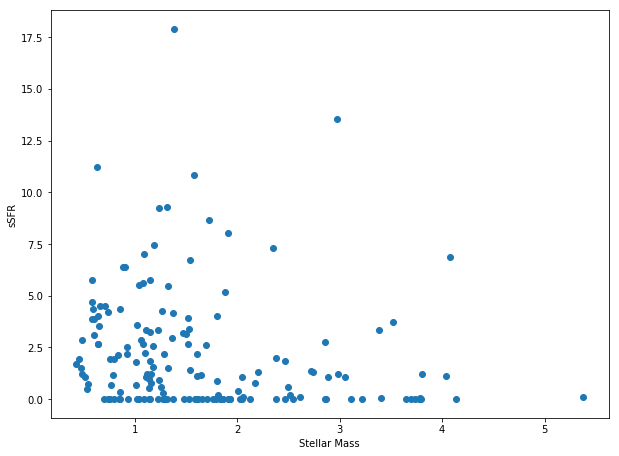

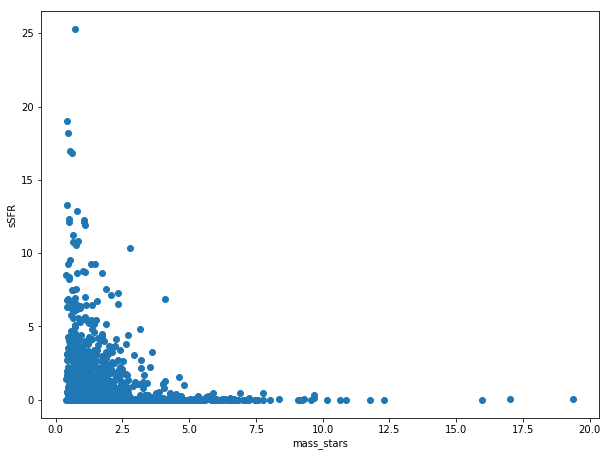

In [13]:
f1, ax= plt.subplots(1,1,figsize=(10,7.5))
scatter1=ax.scatter(threeD_pairs["mass_stars"],threeD_pairs["sSFR"])
ax.set_xlabel("Stellar Mass")
ax.set_ylabel("sSFR")
ax.invert_xaxis
#fig.colorbar(scatter, ax=axes)


f2, ax2= plt.subplots(1,1,figsize=(10,7.5))
scatter2=ax2.scatter(observe_pairs["mass_stars"],observe_pairs["sSFR"])
ax2.set_xlabel("mass_stars")
ax2.set_ylabel("sSFR")
ax2.invert_xaxis

plt.show()

In [14]:
#pd.plotting.scatter_matrix(threeD_pairs, figsize=(15, 15),
#                           marker='o', hist_kwds={'bins': 20}, s=60,
#                           alpha=.8)

<bound method _AxesBase.invert_xaxis of <matplotlib.axes._subplots.AxesSubplot object at 0x10c605278>>

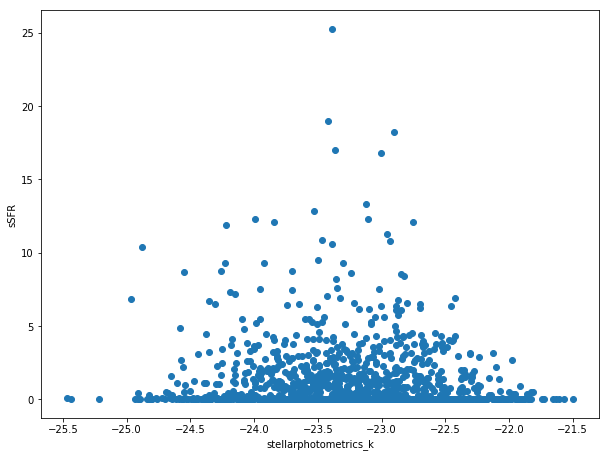

In [15]:
f3, ax3= plt.subplots(1,1,figsize=(10,7.5))
scatter3=ax3.scatter(observe_pairs["stellarphotometrics_k"],observe_pairs["sSFR"])
ax3.set_xlabel("stellarphotometrics_k")
ax3.set_ylabel("sSFR")
ax3.invert_xaxis

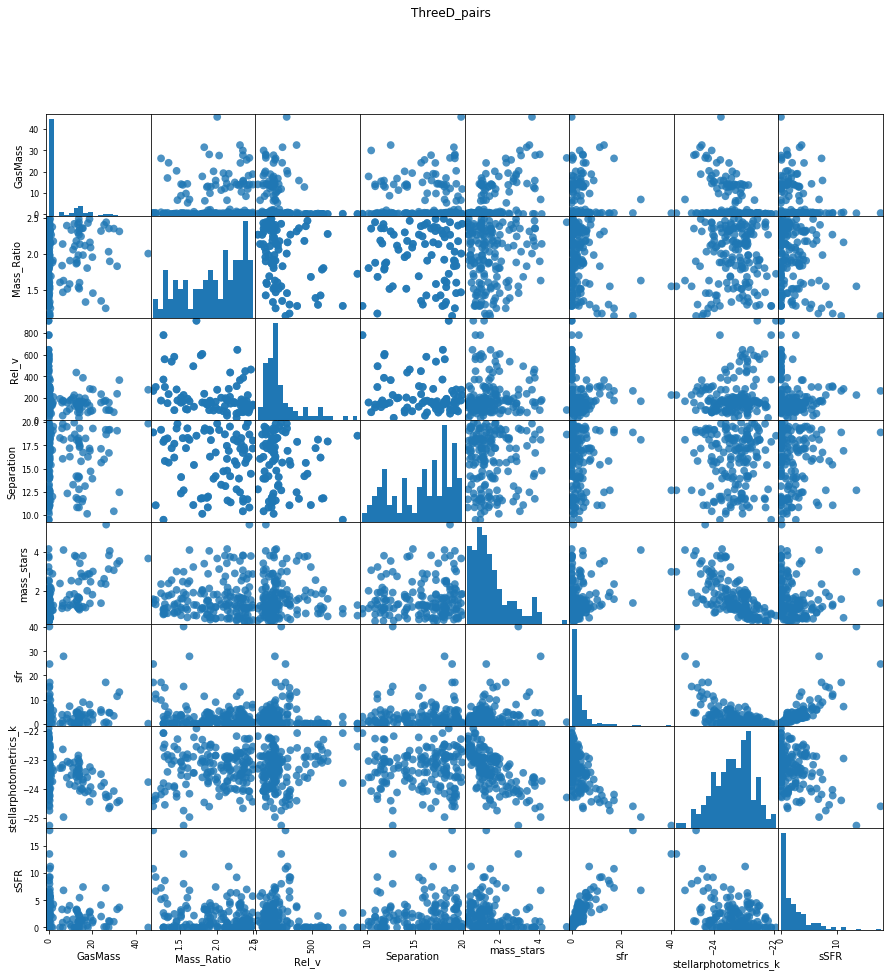

In [16]:
fig=pd.plotting.scatter_matrix(threeD_pairs.drop(["id","pos_x","pos_y","pos_z","vel_x","vel_y","vel_z"],axis=1) , figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.suptitle("ThreeD_pairs")
plt.savefig('/Users/spencershortt/TNG2019/threeD_matrix_plot.png')

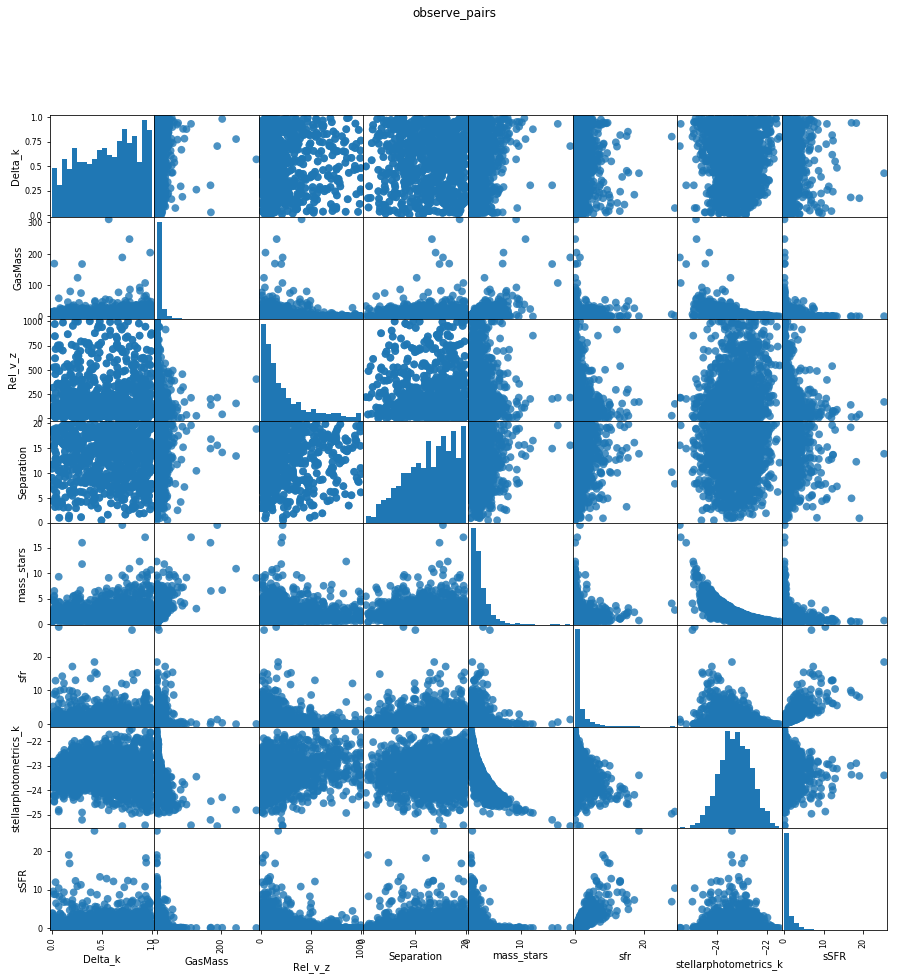

In [17]:
fig=pd.plotting.scatter_matrix(observe_pairs.drop(["id","pos_x","pos_y","pos_z","vel_x","vel_y","vel_z"],axis=1) , figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)
plt.suptitle("observe_pairs")
plt.savefig('/Users/spencershortt/TNG2019/observe_matrix_plot2.png')

<bound method _AxesBase.invert_xaxis of <matplotlib.axes._subplots.AxesSubplot object at 0x1155da240>>

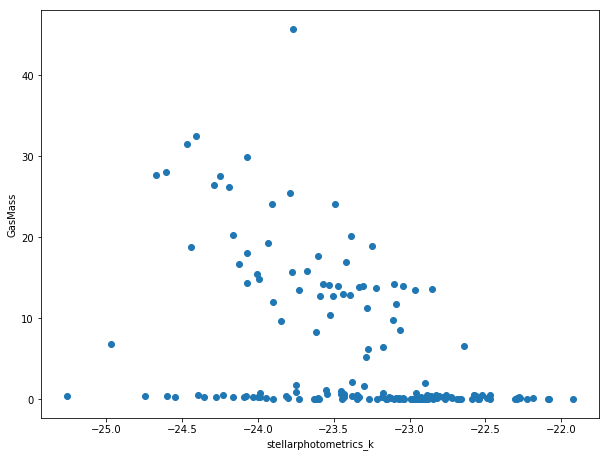

In [18]:
f4, ax4= plt.subplots(1,1,figsize=(10,7.5))
scatter4=ax4.scatter(threeD_pairs["stellarphotometrics_k"],threeD_pairs["GasMass"])
ax4.set_xlabel("stellarphotometrics_k")
ax4.set_ylabel("GasMass")
ax4.invert_xaxis

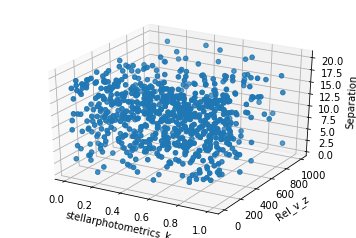

In [19]:


threedee = plt.figure().gca(projection='3d')
threedee.scatter(observe_pairs["Delta_k"], observe_pairs["Rel_v_z"], observe_pairs["Separation"])
threedee.set_xlabel("stellarphotometrics_k")
threedee.set_ylabel("Rel_v_z")
threedee.set_zlabel("Separation")
plt.show()


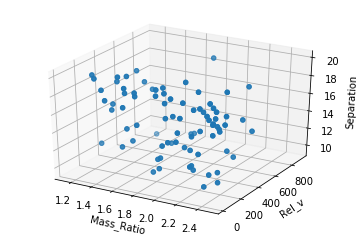

In [20]:
threedee2 = plt.figure().gca(projection='3d')
threedee2.scatter(threeD_pairs["Mass_Ratio"], threeD_pairs["Rel_v"], threeD_pairs["Separation"])
threedee2.set_xlabel("Mass_Ratio")
threedee2.set_ylabel("Rel_v")
threedee2.set_zlabel("Separation")
plt.show()

In [21]:
threeD_pairs[['sSFR','GasMass','stellarphotometrics_k']]

,sSFR,GasMass,stellarphotometrics_k
0,0.084481,1.204250,-23.5536
1,6.375276,0.558519,-22.8834
2,4.281431,2.160950,-23.3781
3,4.687014,0.234724,-22.8839
11,0.000000,0.000000,-22.5902
12,0.000000,0.000000,-22.0831
13,0.000000,0.000000,-23.9017
14,2.501345,0.187362,-23.9464
15,0.000000,0.091068,-23.6248
16,0.000000,0.000000,-22.9768


In [22]:
#print(len(observe_pairs.id.values))
#counter=0
#for id in observe_pairs.id:
    #print(id)
 #   counter+=1
#print(counter)    
    #print("http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/"+str(id)+"/skirt/image_g_sdss.png")
 #   webbrowser.open("http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/"+str(id)+"/skirt/image_g_sdss.png")

In [23]:
'''
no_pic_list=[60818,
88774,
137910,
137919,
146223,
168418,
175246,
220587,
226211,
227582,
227587,
248165,
248167,
299430]'''

'\nno_pic_list=[60818,\n88774,\n137910,\n137919,\n146223,\n168418,\n175246,\n220587,\n226211,\n227582,\n227587,\n248165,\n248167,\n299430]'

In [24]:
morph_data = pd.read_excel('/Users/spencershortt/Documents/morph_data.xlsx')
morphs=pd.DataFrame(morph_data)
morphs.head()

,id,Gini,M20,F,C,n
0,41619,0.4418,-1.5629,-0.69,2.34,0.60
1,41652,0.4200,-1.5400,-0.81,2.27,0.70
2,52647,0.6000,-2.0500,0.41,3.66,2.90
3,52652,0.4700,-1.5400,-0.56,2.47,2.59
4,52670,0.5100,-1.7000,-0.25,2.73,1.69


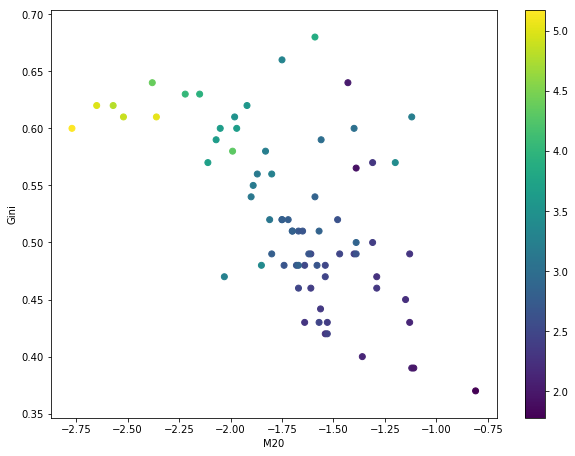

In [25]:
fig, axes=plt.subplots(1,1,figsize=(10,7.5))
scatter=axes.scatter(morphs["M20"],morphs["Gini"], c=morphs["C"])
axes.set_xlabel("M20")
axes.set_ylabel("Gini")
axes.invert_xaxis
fig.colorbar(scatter, ax=axes)
